In [293]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment-analysis-on-movie-reviews/sampleSubmission.csv
/kaggle/input/sentiment-analysis-on-movie-reviews/train.tsv.zip
/kaggle/input/sentiment-analysis-on-movie-reviews/test.tsv.zip


In [294]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [295]:
dataset_dir = "/kaggle/input/sentiment-analysis-on-movie-reviews"

train_dir = dataset_dir + "/train.tsv.zip"
test_dir = dataset_dir + "/test.tsv.zip"

In [296]:
os.listdir(dataset_dir)

['sampleSubmission.csv', 'train.tsv.zip', 'test.tsv.zip']

In [297]:
# Read Data
train_df = pd.read_csv(train_dir, sep="\t")
train_df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",1
1,2,1,A series of escapades demonstrating the adage that what is good for the goose,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [298]:
test_df = pd.read_csv(test_dir, sep="\t")
test_df.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine effort .
1,156062,8545,An intermittently pleasing but mostly routine effort
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


In [299]:
train_df = train_df.drop_duplicates(subset=["SentenceId"], keep="first")
train_df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",1
63,64,2,"This quiet , introspective and entertaining independent is worth seeking .",4
81,82,3,"Even fans of Ismail Merchant 's work , I suspect , would have a hard time sitting through this one .",1
116,117,4,"A positively thrilling combination of ethnography and all the intrigue , betrayal , deceit and murder of a Shakespearean tragedy or a juicy soap opera .",3
156,157,5,Aggressive self-glorification and a manipulative whitewash .,1


In [300]:
train_df.reset_index(inplace = True, drop = True)
train_df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",1
1,64,2,"This quiet , introspective and entertaining independent is worth seeking .",4
2,82,3,"Even fans of Ismail Merchant 's work , I suspect , would have a hard time sitting through this one .",1
3,117,4,"A positively thrilling combination of ethnography and all the intrigue , betrayal , deceit and murder of a Shakespearean tragedy or a juicy soap opera .",3
4,157,5,Aggressive self-glorification and a manipulative whitewash .,1


In [301]:
test_df = test_df.drop_duplicates(subset=["SentenceId"], keep="first")
test_df.reset_index(inplace = True, drop = True)
test_df.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine effort .
1,156076,8546,"Kidman is really the only thing that 's worth watching in Birthday Girl , a film by the stage-trained Jez Butterworth -LRB- Mojo -RRB- that serves as yet another example of the sad decline of British comedies in the post-Full Monty world ."
2,156154,8547,Once you get into its rhythm ... the movie becomes a heady experience .
3,156178,8548,I kept wishing I was watching a documentary about the wartime Navajos and what they accomplished instead of all this specious Hollywood hoo-ha .
4,156219,8549,"Kinnear does n't aim for our sympathy , but rather delivers a performance of striking skill and depth ."


In [302]:
test_df.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine effort .
1,156076,8546,"Kidman is really the only thing that 's worth watching in Birthday Girl , a film by the stage-trained Jez Butterworth -LRB- Mojo -RRB- that serves as yet another example of the sad decline of British comedies in the post-Full Monty world ."
2,156154,8547,Once you get into its rhythm ... the movie becomes a heady experience .
3,156178,8548,I kept wishing I was watching a documentary about the wartime Navajos and what they accomplished instead of all this specious Hollywood hoo-ha .
4,156219,8549,"Kinnear does n't aim for our sympathy , but rather delivers a performance of striking skill and depth ."


## EDA

In [303]:
train_df.shape

(8529, 4)

In [304]:
test_df.shape

(3310, 3)

In [305]:
# The dataset is too large lets reduce it
# train_df = train_df.head(500)
# test_df = test_df.head(500)

In [306]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8529 entries, 0 to 8528
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   PhraseId    8529 non-null   int64 
 1   SentenceId  8529 non-null   int64 
 2   Phrase      8529 non-null   object
 3   Sentiment   8529 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 266.7+ KB


In [307]:
train_df.describe()

,PhraseId,SentenceId,Sentiment
count,8529.000000,8529.000000,8529.000000
mean,81492.254543,4269.683433,2.063196
std,44268.957774,2466.705592,1.276636
min,1.000000,1.000000,0.000000
25%,43992.000000,2133.000000,1.000000
50%,82655.000000,4268.000000,2.000000
75%,119774.000000,6406.000000,3.000000
max,156040.000000,8544.000000,4.000000


<AxesSubplot:>

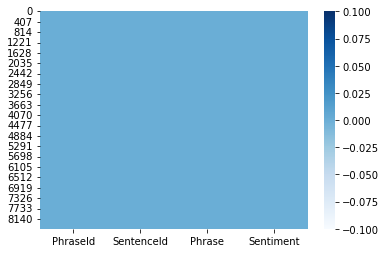

In [308]:
sns.heatmap(train_df.isnull(), cmap= 'Blues')

<AxesSubplot:>

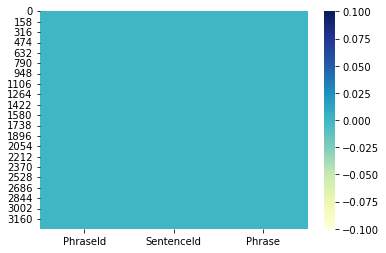

In [309]:
sns.heatmap(test_df.isnull(), cmap= 'YlGnBu')

In [310]:
train_df.columns

Index(['PhraseId', 'SentenceId', 'Phrase', 'Sentiment'], dtype='object')

In [311]:
#Sentiment is between 1 - 5 stars given by the reviewer
train_df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",1
1,64,2,"This quiet , introspective and entertaining independent is worth seeking .",4
2,82,3,"Even fans of Ismail Merchant 's work , I suspect , would have a hard time sitting through this one .",1
3,117,4,"A positively thrilling combination of ethnography and all the intrigue , betrayal , deceit and murder of a Shakespearean tragedy or a juicy soap opera .",3
4,157,5,Aggressive self-glorification and a manipulative whitewash .,1


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

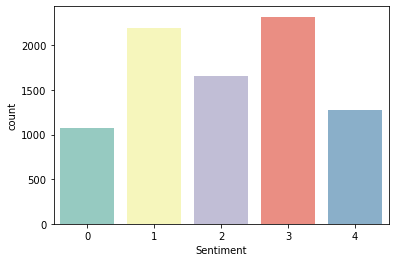

In [312]:
sns.countplot(x='Sentiment', data= train_df, palette = 'Set3')

In [313]:
train_df['Phrase'][30]

'Nothing more than a run-of-the-mill action flick .'

## NLTK - Natural Language Toolkit

NLTK the older kinda of way of doing sentiment analysis, with a model called VADER which uses a bag of words approach.

Roberta type model is a pretrained model from hugging face its a more advanced transformer model 

In [314]:
import nltk

In [315]:
example_review = train_df['Phrase'][80]
example_review

"All in all , it 's a pretty good execution of a story that 's a lot richer than the ones Hollywood action screenwriters usually come up with on their own ."

Splits the sentence into parts/ words. In NLP you need to convert the word into some format a computer can understand, Tokenizing is a way of doing that


### Tokenization

In [316]:
tokens = nltk.word_tokenize(example_review)
tokens

['All',
 'in',
 'all',
 ',',
 'it',
 "'s",
 'a',
 'pretty',
 'good',
 'execution',
 'of',
 'a',
 'story',
 'that',
 "'s",
 'a',
 'lot',
 'richer',
 'than',
 'the',
 'ones',
 'Hollywood',
 'action',
 'screenwriters',
 'usually',
 'come',
 'up',
 'with',
 'on',
 'their',
 'own',
 '.']

### Part Of Speech Tagging

Depending on a sentence a word can be either a noun or a verb therefore NLTK can find part of speech for each word. 
We got each token and its part of speech eg 'DT - determiner' for 'all, a, the, those, our, his...'

In [317]:
# This parts of speech values are codes are abbreviations
tagged = nltk.pos_tag(tokens)
tagged


[('All', 'DT'),
 ('in', 'IN'),
 ('all', 'DT'),
 (',', ','),
 ('it', 'PRP'),
 ("'s", 'VBZ'),
 ('a', 'DT'),
 ('pretty', 'RB'),
 ('good', 'JJ'),
 ('execution', 'NN'),
 ('of', 'IN'),
 ('a', 'DT'),
 ('story', 'NN'),
 ('that', 'WDT'),
 ("'s", 'VBZ'),
 ('a', 'DT'),
 ('lot', 'NN'),
 ('richer', 'JJR'),
 ('than', 'IN'),
 ('the', 'DT'),
 ('ones', 'NNS'),
 ('Hollywood', 'NNP'),
 ('action', 'NN'),
 ('screenwriters', 'NNS'),
 ('usually', 'RB'),
 ('come', 'VBP'),
 ('up', 'RP'),
 ('with', 'IN'),
 ('on', 'IN'),
 ('their', 'PRP$'),
 ('own', 'JJ'),
 ('.', '.')]

### Entities

This parts of speech are put in entities- information extraction technique that identifies and classifies key elements from text into categories


In [318]:
# It takes tokens and it'll group them into chunks of text
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  All/DT
  in/IN
  all/DT
  ,/,
  it/PRP
  's/VBZ
  a/DT
  pretty/RB
  good/JJ
  execution/NN
  of/IN
  a/DT
  story/NN
  that/WDT
  's/VBZ
  a/DT
  lot/NN
  richer/JJR
  than/IN
  the/DT
  ones/NNS
  (PERSON Hollywood/NNP)
  action/NN
  screenwriters/NNS
  usually/RB
  come/VBP
  up/RP
  with/IN
  on/IN
  their/PRP$
  own/JJ
  ./.)


## VADER Seniment Scoring

VADER takes all the words in our sentence and it has a value of either positive, negative or neutral for each of those words. it'll add all the words to tell you how posive or negativce or neutral the statement is.

This approach doesnt take into account the relationship between the words, which in human speech is very important. We also remove stop words which are words that dont have any pos or neg or neutral to them, they are just for the structure of the sentence eg 'he', 'and', 'our'..

In [319]:
from nltk.sentiment import SentimentIntensityAnalyzer

## Progressor bar for loops
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

- we can run this on text and see the sentiment based on the words
- the results are on scale of 0-1
- compound is aggregation btwn neg, pos and neu on scale of -1 to 1 it represent the confidence of the sentence on how pos, neu or neg it is


In [320]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [321]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [322]:
example_review

"All in all , it 's a pretty good execution of a story that 's a lot richer than the ones Hollywood action screenwriters usually come up with on their own ."

In [323]:
sia.polarity_scores(example_review)

{'neg': 0.0, 'neu': 0.716, 'pos': 0.284, 'compound': 0.8591}

In [324]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(train_df.iterrows(), total=len(train_df)):
    text = row['Phrase']
    myid = row['PhraseId']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/8529 [00:00<?, ?it/s]

In [325]:
vaders = pd.DataFrame(res)
vaders.head()

,1,64,82,117,157,167,199,214,248,260,...,155912,155915,155931,155950,155964,155985,155998,156022,156032,156040
neg,0.0000,0.0000,0.2050,0.437,0.281,0.197,0.5100,0.0000,0.0000,0.3460,...,0.0,0.0000,0.1690,0.0,0.3230,0.0,0.0000,0.0000,0.0,0.3420
neu,0.8430,0.5930,0.7950,0.385,0.526,0.673,0.4900,0.5760,0.8510,0.6540,...,1.0,0.7880,0.4220,1.0,0.6770,1.0,0.6350,0.7060,1.0,0.6580
pos,0.1570,0.4070,0.0000,0.179,0.193,0.130,0.0000,0.4240,0.1490,0.0000,...,0.0,0.2120,0.4090,0.0,0.0000,0.0,0.3650,0.2940,0.0,0.0000
compound,0.5579,0.5859,-0.3818,-0.886,-0.128,-0.340,-0.6369,0.8519,0.0572,-0.5719,...,0.0,0.4159,0.8126,0.0,-0.8885,0.0,0.8723,0.6124,0.0,-0.8074


In [326]:
vaders = pd.DataFrame(res).T
vaders.head()

,neg,neu,pos,compound
1,0.000,0.843,0.157,0.5579
64,0.000,0.593,0.407,0.5859
82,0.205,0.795,0.000,-0.3818
117,0.437,0.385,0.179,-0.8860
157,0.281,0.526,0.193,-0.1280


In [327]:
train_df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",1
1,64,2,"This quiet , introspective and entertaining independent is worth seeking .",4
2,82,3,"Even fans of Ismail Merchant 's work , I suspect , would have a hard time sitting through this one .",1
3,117,4,"A positively thrilling combination of ethnography and all the intrigue , betrayal , deceit and murder of a Shakespearean tragedy or a juicy soap opera .",3
4,157,5,Aggressive self-glorification and a manipulative whitewash .,1


In [328]:
vaders = vaders.reset_index().rename(columns={'index': 'PhraseId'})
vaders = vaders.merge(train_df, how='left')

# we assume the higher the sentiment the more positive the text or vice versa
# Now we have sentiment score and metadata
vaders.head()

,PhraseId,neg,neu,pos,compound,SentenceId,Phrase,Sentiment
0,1,0.000,0.843,0.157,0.5579,1,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",1
1,64,0.000,0.593,0.407,0.5859,2,"This quiet , introspective and entertaining independent is worth seeking .",4
2,82,0.205,0.795,0.000,-0.3818,3,"Even fans of Ismail Merchant 's work , I suspect , would have a hard time sitting through this one .",1
3,117,0.437,0.385,0.179,-0.8860,4,"A positively thrilling combination of ethnography and all the intrigue , betrayal , deceit and murder of a Shakespearean tragedy or a juicy soap opera .",3
4,157,0.281,0.526,0.193,-0.1280,5,Aggressive self-glorification and a manipulative whitewash .,1


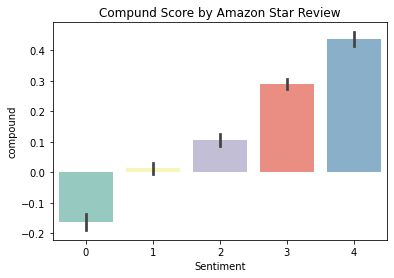

In [329]:
# the lower the sentiment the lower the compound or vice versa
ax = sns.barplot(data=vaders, x='Sentiment', y='compound', palette = 'Set3')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

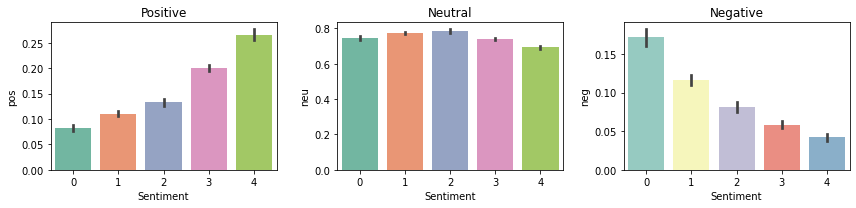

In [330]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Sentiment', y='pos', ax=axs[0], palette = 'Set2')
sns.barplot(data=vaders, x='Sentiment', y='neu', ax=axs[1], palette = 'Set2')
sns.barplot(data=vaders, x='Sentiment', y='neg', ax=axs[2], palette = 'Set3')
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

## Roberta Pretrained Model

Our previous model scored each word individually, it
didnt take into account relationship between words, human language depends a lot on context. the transformers have become more popular because they can pick up on context.

In [331]:
# we gonna use hugging face library
# tokenize words
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

- this model has been pretrained on data for sentiment
- when we run the autotokenizer and AutoModelForSequenceClassification and load it from a pre trained model it wil pull the saved model weights, basically its transfer learning.
- this model was trained on twitter comments that were labelled we will apply this trained weights to our dataset, therefore theres no need to train
- first time running this will download all the weights

In [332]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [333]:
# VADER results on example
print(example_review)
sia.polarity_scores(example_review)

All in all , it 's a pretty good execution of a story that 's a lot richer than the ones Hollywood action screenwriters usually come up with on their own .


{'neg': 0.0, 'neu': 0.716, 'pos': 0.284, 'compound': 0.8591}

In [334]:
# Run for the Roberta Model
# Encode text where it takes text and put it into 1s and 0s embeddings that the model will understand
encoded_text = tokenizer(example_review, return_tensors='pt')
encoded_text

{'input_ids': tensor([[    0,  3684,    11,    70,  2156,    24,   128,    29,    10,  1256,
           205,  7356,     9,    10,   527,    14,   128,    29,    10,   319,
         24230,    87,     5,  1980,  3049,   814,  2441, 17934,  2333,   283,
            62,    19,    15,    49,   308,   479,     2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [335]:
# output is a tensor with our results
output = model(**encoded_text)
output

SequenceClassifierOutput(loss=None, logits=tensor([[-2.3056,  0.0668,  2.7581]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [336]:
# take the output from being a tensor and make it into numpy so that we can store it locally
# our scores are 3 different scores in numpy array
# neg, neu, pos score for this text
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores

array([0.00588595, 0.06311539, 0.93099874], dtype=float32)

In [337]:
np.argmax(scores)

2

In [338]:
# roberta says its positive review while vader says its neutral
# from reading it the roberta got the context and gave the correct sentiment
# this shows roberta is more powerful that the vader model
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.00588595, 'roberta_neu': 0.06311539, 'roberta_pos': 0.93099874}


In [339]:
def polarity_scores_roberta(example_review):
    encoded_text = tokenizer(example_review, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [340]:
train_df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",1
1,64,2,"This quiet , introspective and entertaining independent is worth seeking .",4
2,82,3,"Even fans of Ismail Merchant 's work , I suspect , would have a hard time sitting through this one .",1
3,117,4,"A positively thrilling combination of ethnography and all the intrigue , betrayal , deceit and murder of a Shakespearean tragedy or a juicy soap opera .",3
4,157,5,Aggressive self-glorification and a manipulative whitewash .,1


In [341]:
# this roberta models are optimised to run on a gpu
res = {}
for i, row in tqdm(train_df.iterrows(), total=len(train_df)):
    try:
        text = row['Phrase']
        myid = row['PhraseId']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/8529 [00:00<?, ?it/s]

In [342]:
robs_results

[1,
 2,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 2,
 0,
 2,
 2,
 1,
 2,
 0,
 1,
 2,
 1,
 0,
 2,
 1,
 1,
 1,
 1,
 0,
 2,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 0,
 2,
 2,
 1,
 0,
 2,
 0,
 2,
 2,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 2,
 2,
 0,
 0,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 2,
 2,
 1,
 0,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 0,
 2,
 2,
 1,
 0,
 2,
 0,
 0,
 0,
 1,
 0,
 2,
 1,
 1,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 2,
 1,
 2,
 2,
 2,
 1,
 0,
 1,
 2,
 2,
 1,
 2,
 0,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 0,
 2,
 0,
 1,
 0,
 2,
 0,
 2,
 0,
 0,
 2,
 1,
 1,
 0,
 2,
 0,
 2,
 0,
 1,
 2,
 1,
 0,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 1,
 0,
 1,
 0,
 2,
 1,
 0,
 2,
 2,
 2,
 1,
 1,
 0,
 2,
 0,
 0,
 2,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 2,
 0,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 2,
 1,
 2,
 1,
 2,
 0,
 1,
 1,
 2,
 2,
 0,
 2,
 2,
 0,


In [343]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'PhraseId'})
results_df = results_df.merge(train_df, how='left')

In [344]:
results_df.head()

,PhraseId,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,SentenceId,Phrase,Sentiment
0,1,0.000,0.843,0.157,0.5579,0.213198,0.653778,0.133024,1,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",1
1,64,0.000,0.593,0.407,0.5859,0.002862,0.120701,0.876437,2,"This quiet , introspective and entertaining independent is worth seeking .",4
2,82,0.205,0.795,0.000,-0.3818,0.749514,0.231712,0.018774,3,"Even fans of Ismail Merchant 's work , I suspect , would have a hard time sitting through this one .",1
3,117,0.437,0.385,0.179,-0.8860,0.222118,0.510770,0.267112,4,"A positively thrilling combination of ethnography and all the intrigue , betrayal , deceit and murder of a Shakespearean tragedy or a juicy soap opera .",3
4,157,0.281,0.526,0.193,-0.1280,0.811069,0.176705,0.012226,5,Aggressive self-glorification and a manipulative whitewash .,1


## Method 3 - use pipeline

In [345]:
from transformers import pipeline

In [346]:
sentiment_classifier = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


In [347]:
# example
sentiment_classifier(['this was just fine, a bit long though','lame, total waste of money'])

[{'label': 'POSITIVE', 'score': 0.9989022016525269},
 {'label': 'NEGATIVE', 'score': 0.9998000264167786}]

In [348]:
train_df['Phrase'][1]

'This quiet , introspective and entertaining independent is worth seeking .'

In [349]:
sentiment_classifier(train_df['Phrase'][1])

[{'label': 'POSITIVE', 'score': 0.9998384714126587}]

In [350]:
train_df['Pipeline'] = train_df['Phrase'].apply(lambda x: sentiment_classifier(x))

In [351]:
train_df.head()

,PhraseId,SentenceId,Phrase,Sentiment,Pipeline
0,1,1,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",1,"[{'label': 'NEGATIVE', 'score': 0.9989483952522278}]"
1,64,2,"This quiet , introspective and entertaining independent is worth seeking .",4,"[{'label': 'POSITIVE', 'score': 0.9998384714126587}]"
2,82,3,"Even fans of Ismail Merchant 's work , I suspect , would have a hard time sitting through this one .",1,"[{'label': 'NEGATIVE', 'score': 0.999007523059845}]"
3,117,4,"A positively thrilling combination of ethnography and all the intrigue , betrayal , deceit and murder of a Shakespearean tragedy or a juicy soap opera .",3,"[{'label': 'POSITIVE', 'score': 0.9998266100883484}]"
4,157,5,Aggressive self-glorification and a manipulative whitewash .,1,"[{'label': 'NEGATIVE', 'score': 0.999470055103302}]"


## Roberta model submit

In [368]:
sample_submission_df = pd.read_csv('/kaggle/input/sentiment-analysis-on-movie-reviews/test.tsv.zip',sep='\t')
sample_submission_df.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine effort .
1,156062,8545,An intermittently pleasing but mostly routine effort
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


In [369]:
sample_submission_df = tdf.drop_duplicates(subset=['SentenceId'], keep='first')
sample_submission_df.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine effort .
15,156076,8546,"Kidman is really the only thing that 's worth watching in Birthday Girl , a film by the stage-trained Jez Butterworth -LRB- Mojo -RRB- that serves as yet another example of the sad decline of British comedies in the post-Full Monty world ."
93,156154,8547,Once you get into its rhythm ... the movie becomes a heady experience .
117,156178,8548,I kept wishing I was watching a documentary about the wartime Navajos and what they accomplished instead of all this specious Hollywood hoo-ha .
158,156219,8549,"Kinnear does n't aim for our sympathy , but rather delivers a performance of striking skill and depth ."


In [370]:
def polarity_scores_roberta_submit(example_review):
    encoded_text = tokenizer(example_review, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    pred = np.argmax(scores)
    return pred

In [371]:
# this roberta models are optimised to run on a gpu
roberta_results = []
for i, row in tqdm(sample_submission_df.iterrows(), total=len(sample_submission_df)):
        text = row['Phrase']
        myid = row['PhraseId']
        rob_result = polarity_scores_roberta_submit(text)
        roberta_results.append(rob_result)

  0%|          | 0/3310 [00:00<?, ?it/s]

In [372]:
sample_submission_df['Sentiment'] = np.array(roberta_results)

In [373]:
sample_submission_df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,156061,8545,An intermittently pleasing but mostly routine effort .,2
15,156076,8546,"Kidman is really the only thing that 's worth watching in Birthday Girl , a film by the stage-trained Jez Butterworth -LRB- Mojo -RRB- that serves as yet another example of the sad decline of British comedies in the post-Full Monty world .",1
93,156154,8547,Once you get into its rhythm ... the movie becomes a heady experience .,2
117,156178,8548,I kept wishing I was watching a documentary about the wartime Navajos and what they accomplished instead of all this specious Hollywood hoo-ha .,0
158,156219,8549,"Kinnear does n't aim for our sympathy , but rather delivers a performance of striking skill and depth .",1


In [374]:
submit_df = sample_submission_df[['PhraseId','Sentiment']]

In [375]:
submit_df.head()

,PhraseId,Sentiment
0,156061,2
15,156076,1
93,156154,2
117,156178,0
158,156219,1


In [376]:
submit_df.to_csv('submission.csv', index=False)